### Coffee Sales Analysis Project

- This project focuses on analyzing detailed transaction data from a coffee vending machine, capturing insights about sales patterns, product popularity, and consumer preferences.

- The dataset spans from March 2024 to July 2024, with daily transactional records including the date, time, payment method (cash/card), product name, and transaction amount.


#### Step 1: Import Libraries & Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
data = pd.read_csv('coffee_sales.csv')

In [3]:
# Display the first few rows
data.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [4]:
# Check for missing values
data.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [6]:
# Descriptive Statistics
data.describe()

,money
count,1133.000000
mean,33.105808
std,5.035366
min,18.120000
25%,28.900000
50%,32.820000
75%,37.720000
max,40.000000


In [7]:
data.duplicated().sum()

0

#### Step 2: Data Cleaning & Feature Engineering

In [8]:
# Convert date columns to datetime
data['date'] = pd.to_datetime(data['date'])
data['datetime'] = pd.to_datetime(data['datetime'])

In [9]:
# Extract features
data['month'] = data['date'].dt.to_period('M')
data['day'] = data['date'].dt.dayofweek  # 0 = Monday
data['hour'] = data['datetime'].dt.hour

In [10]:
# Fill missing card values
data['card'].fillna('CASH_TRANSACTION', inplace=True)

#### Step 3: Descriptive Analysis

In [11]:
# Total Sales Overview
print("Total Revenue:", data['money'].sum())
print("Total Transactions:", len(data))
print("Average Transaction Value:", data['money'].mean())

Total Revenue: 37508.880000000005
Total Transactions: 1133
Average Transaction Value: 33.10580759046779


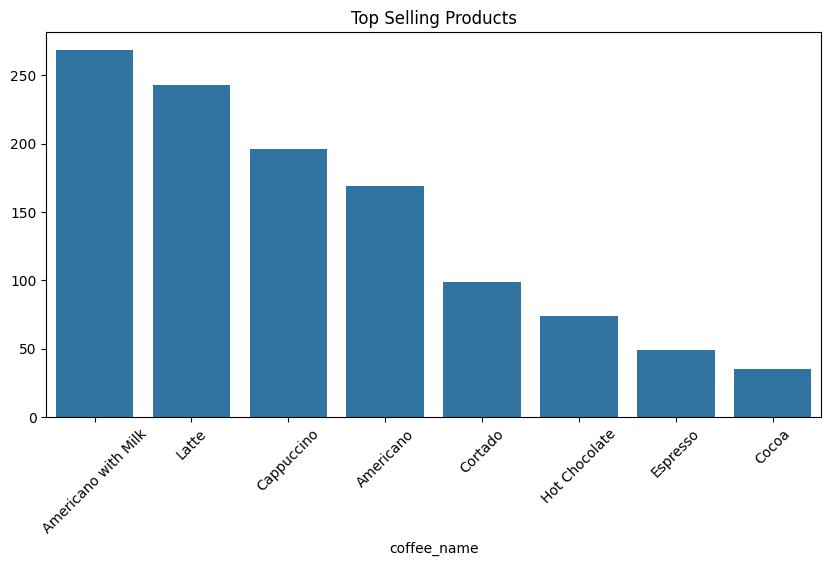

In [12]:
# Top Products
top_products = data['coffee_name'].value_counts()
revenue_by_product = data.groupby('coffee_name')['money'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.index, y=top_products.values)
plt.xticks(rotation=45)
plt.title('Top Selling Products')
plt.show()

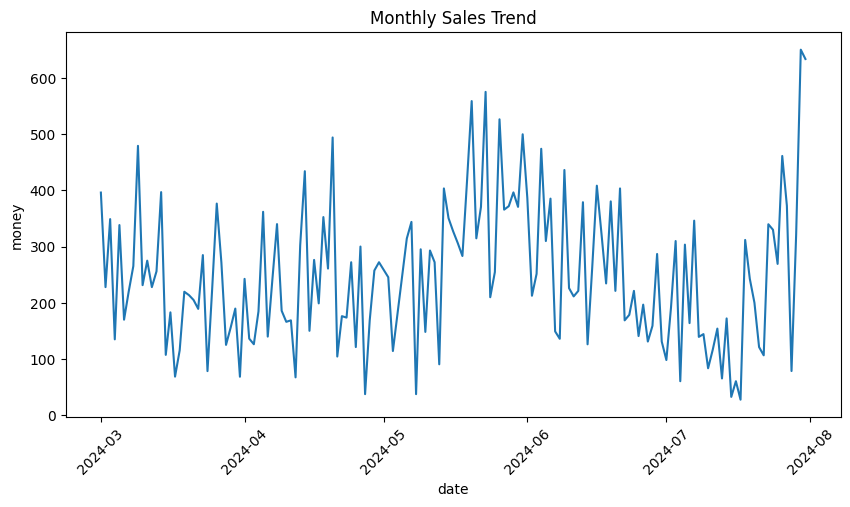

In [13]:
# Sales Over Time
monthly = data.groupby('date')['money'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly, x='date', y='money')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.show()

#### Step 4: Diagnostic Analysis

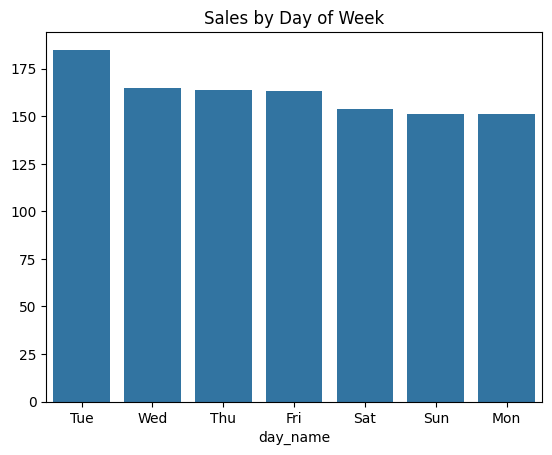

In [14]:
# Sales by Day of Week
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
data['day_name'] = data['day'].map(lambda x: days[x])

sales_by_day = data['day_name'].value_counts()

sns.barplot(x=sales_by_day.index, y=sales_by_day.values)
plt.title("Sales by Day of Week")
plt.show()

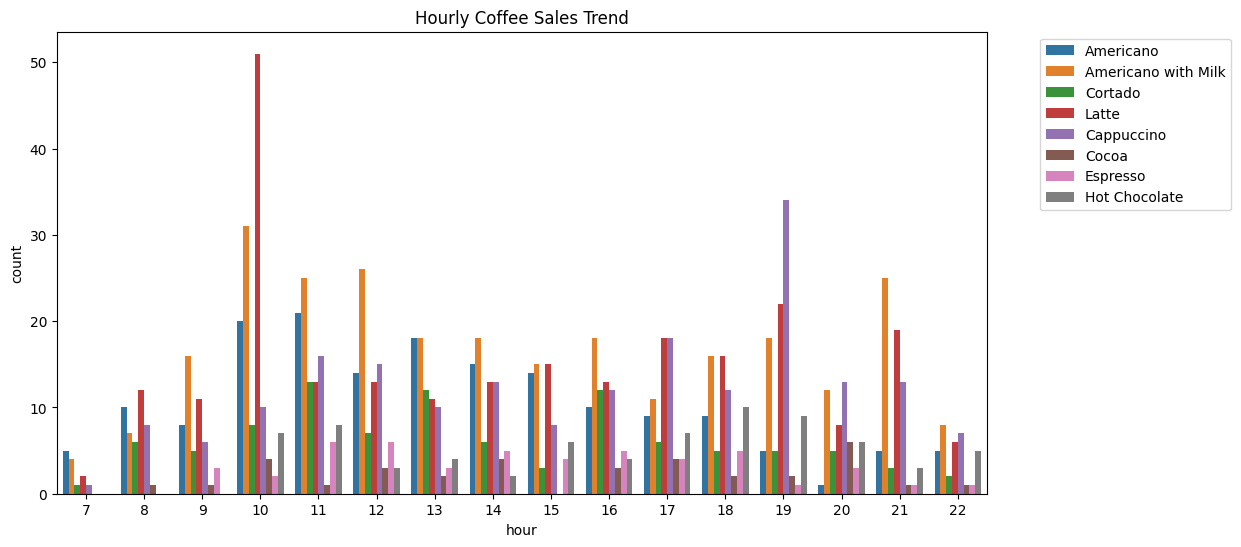

In [15]:
# Hourly Product Trend
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='hour', hue='coffee_name')
plt.title("Hourly Coffee Sales Trend")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

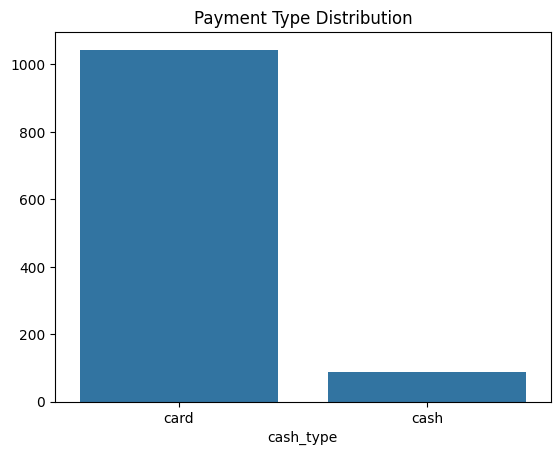

In [16]:
# Payment Type Analysis
payment_type = data['cash_type'].value_counts()

sns.barplot(x=payment_type.index, y=payment_type.values)
plt.title("Payment Type Distribution")
plt.show()

#### Step 5: Predictive Analysis (Sales Forecasting)

In [17]:
# Daily Sales Preparation
daily_sales = data.groupby('date')['money'].sum().reset_index()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Feature: days since first transaction
daily_sales['days_since'] = (daily_sales['date'] - daily_sales['date'].min()).dt.days

X = daily_sales[['days_since']]
y = daily_sales['money']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [18]:
# Evaluation
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 13446.901666486381
R2 Score: -0.03578849276789797


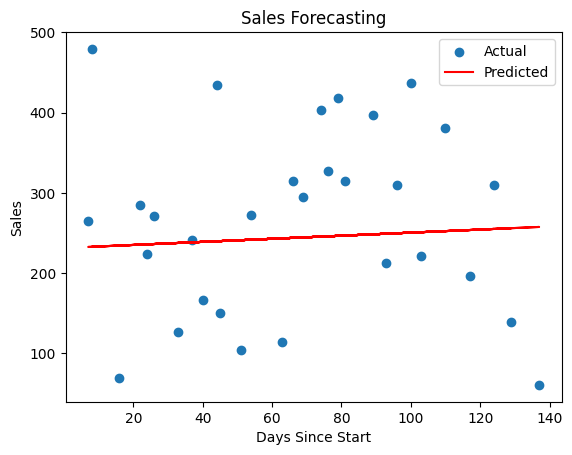

In [19]:
# Visualizing Prediction
plt.scatter(X_test, y_test, label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel("Days Since Start")
plt.ylabel("Sales")
plt.title("Sales Forecasting")
plt.legend()
plt.show()

#### Step 6: Prescriptive Insights

In [20]:
# 1. Optimal Restock Times
peak_hours = data['hour'].value_counts().head(3)
print("Restock around these peak hours:", peak_hours.index.tolist())


Restock around these peak hours: [10, 11, 19]


In [21]:
# 2. Promote low-performing products during high-traffic periods
low_sellers = data['coffee_name'].value_counts().tail(3).index
print("Low performers to push:", list(low_sellers))

Low performers to push: ['Hot Chocolate', 'Espresso', 'Cocoa']


In [22]:
# 3. Top day for promotions
top_day = data['day_name'].value_counts().idxmax()
print("Best day for promos:", top_day)

Best day for promos: Tue
